In [2]:
#log into arcGIS PRO
from arcgis.gis import GIS
gis = GIS("pro")


In [5]:
#create variables to set up and upload the map
csv_path = "jdn8608_earthquakes.csv"
csv_properties = {'title':'JDN_8608_EQ_MAP_LAB03','description':'Map for lab 3 for RIT GIS 386', 'tags':'jdn_lab03_2019'}
eq_csv_item = gis.content.add(item_properties=csv_properties, data=csv_path)

In [7]:
#Publish the map
eq_csv_item_layer_item = eq_csv_item.publish()
eq_csv_item_layer_item

<Item title:"JDN_8608_EQ_MAP_LAB03" type:Feature Layer Collection owner:jdn8608@rit.edu_RITArcGIS>

In [8]:
#Create a variable map to just display japan
japan_map = gis.map('Japan', zoomlevel=4)
japan_map #display this map layer

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [9]:
#add a layer to show our earthquake csv file data
eq_names_lyr = eq_csv_item_layer_item.layers[0]
japan_map.add_layer(eq_names_lyr)

In [10]:
#Create a custom symbol that marks where the earthquakes are
sym =  {
    "type": "esriSMS",
    "style": "esriSMSCircle",
    "color": [80,253,231,255], #I choosed a teal/blue color
    "size": 20,
    "angle": 0,
    "xoffset": 0,
    "yoffset": 0,
    "outline": 
	{
     "color": [255,255,255,255],#outline in white
     "width": 1
    }}
#render these new symbols
rend = {"renderer":"SimpleRenderer", "symbol":sym, "field_name": "FEATURE_ID"}
japan_map.add_layer(eq_names_lyr, rend)

In [12]:
#make a table where mag >1 and display the first 5 values with 'df.head'
df = eq_names_lyr.query(where="mag > 1").sdf
#only show first five records
df.head()

,ObjectId,SHAPE,depth,depthError,dmin,gap,horizontalError,id,latitude,locationSource,...,magSource,magType,net,nst,place,rms,status,time,type,updated
0,1,"{""x"": -13669662.408155333, ""y"": 4696420.903484...",2.65,0.24,0.01047,33,0.15,nc73092551,38.8235,nc,...,nc,md,nc,39.0,"6km NW of The Geysers, CA",0.05,reviewed,2018-10-02 11:58:15.750000000,earthquake,2018-10-03 00:41:04.186000109
1,2,"{""x"": 13371819.685527895, ""y"": -1172588.378832...",20.71,5.00,2.77400,37,6.90,us1000h5h5,-10.4747,us,...,us,mww,us,NaN,"33km SSW of Nggongi Satu, Indonesia",1.22,reviewed,2018-10-02 04:49:31.470000029,earthquake,2018-10-03 21:02:50.039999962
2,3,"{""x"": -13560124.029214751, ""y"": 6205324.718452...",-0.99,3.17,0.20400,107,1.59,uw61425222,48.5885,uw,...,uw,ml,uw,10.0,"19km NW of Rockport, Washington",0.32,reviewed,2018-10-02 11:49:46.710000038,earthquake,2018-10-02 16:59:35.470000029
3,5,"{""x"": 18683996.918131985, ""y"": -2013146.658427...",10.00,1.90,4.33800,71,3.30,us1000h5l2,-17.7914,us,...,us,mb,us,NaN,"51km W of Port-Vila, Vanuatu",0.87,reviewed,2018-10-02 11:35:41.210000038,earthquake,2018-10-03 02:09:15.273000002
4,7,"{""x"": -7374426.459294883, ""y"": 2026993.4885126...",11.00,0.70,0.14950,208,0.80,pr2018275009,17.9098,pr,...,pr,md,pr,12.0,"5km SSW of Central Aguirre, Puerto Rico",0.22,reviewed,2018-10-02 11:23:46.339999914,earthquake,2018-10-02 16:36:33.099999905


In [13]:
#Plots these points onto the japan map
df.spatial.plot(map_widget = japan_map)

True

In [15]:
#remove previous layers
japan_map.remove_layers()


True

In [16]:
#creates a map widget with specified vars from the lab pdf
df.spatial.plot(map_widget=japan_map,
               renderer_type='c', #class breaks renderer
               method='esriClassifyNaturalBreaks', #classification algorithm
               class_count=10,
                col='mag', #coloum to use
                cmap='prism', #color map to pick colors for each of the 5 classes
                alpha=0.7 #specify opacity
               )

True

In [18]:
#Creates data for the histo grab
class_breaks = japan_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
print(len(class_breaks))

10


In [19]:
#Properly sets up the ramge of the scale of the histogram
cbs_list = []
cmap_list = []
for cb in class_breaks:
    print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])

1.01 - 1.7755555555555556
1.7755555555555556 - 2.5411111111111113
2.5411111111111113 - 3.3066666666666666
3.3066666666666666 - 4.072222222222223
4.072222222222223 - 4.837777777777778
4.837777777777778 - 5.6033333333333335
5.6033333333333335 - 6.36888888888889
6.36888888888889 - 7.134444444444445
7.134444444444445 - 7.9
7.9 - 7.9


Text(0.5,1,'Histogram of Mag column')

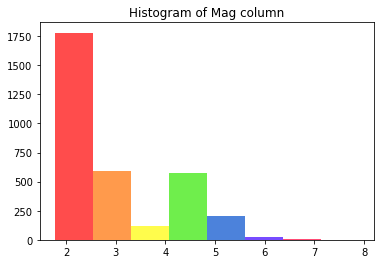

In [22]:
#Creates histogram and prints it
import matplotlib.pyplot as plt
# build a histogram for the same class breaks
n, bins, patches = plt.hist(df['mag'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of Mag column')